I have used this source as inspiration to implemement the follwoing SVM-HOG model - https://duchesnay.github.io/pystatsml/auto_gallery/ml_lab_face_recognition.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Face-Emotion-Recognition-Project' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['.gitignore', 'LICENSE', 'README.md', 'src', 'models', 'personal_dataset', '.git', '.vscode', '__pycache__', 'CW_Dataset', 'train_hog_naive_bayes.ipynb', 'train_function.ipynb', 'hyper-parameter-tuning and training models.ipynb', 'SVM-SIFT train dummy.ipynb', 'References .gdoc', '.ipynb_checkpoints', 'SVM-HOG train dummy.ipynb', 'MLP-HOG train .ipynb', 'Copy of SVM-SIFT train dummy.ipynb', 'Data Exploration.ipynb', 'test_function.ipynb', 'train_sift_naive_bayes.ipynb', 'Copy of SVM-HOG train dummy.ipynb', 'Pre-trained CNN and MLP training.ipynb']


In [ ]:
import sys
modules_needed = ['models','models/feature_descriptors','models/lib','src']
for i in modules_needed:
  if i not in sys.path:
    CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH,i )
    sys.path.append(CODE_PATH)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
zip_path = os.path.join(GOOGLE_DRIVE_PATH,'CW_Dataset/CW_Dataset.zip')

# Copy it to Colab
!cp '{zip_path}' .

# Unzip it
!yes|unzip -q CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CW_Dataset.zip

In [ ]:
from data_loader import import_selected_data, shuffleData
from preprocessing import *
from collections import  Counter
import numpy as np


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install opencv-python==4.4.0.46

     |████████████████████████████████| 49.5MB 71kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
import cv2
from skimage import img_as_ubyte, io, color
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

%matplotlib inline

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [ ]:
X_train,y_train = import_selected_data('train')
X_train, y_train = shuffleData(X_train, y_train)

In [ ]:
Counter(y_train)

Counter({1: 1000, 2: 281, 3: 717, 4: 1000, 5: 1000, 6: 705, 7: 1000})

1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral

In [ ]:
from hog_descriptor import HOG_DESCRIPTOR

In [ ]:
hog_obj = HOG_DESCRIPTOR()

In [ ]:
hog_obj.compute_hog_descriptors(X_train,y_train)

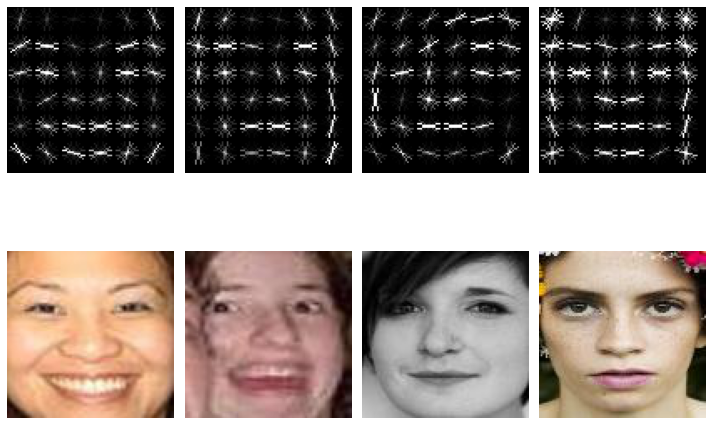

In [ ]:
hog_obj.show_hog_images()

In [ ]:
hog_obj.des_array.shape

(12271, 288)

In [ ]:
hog_features = hog_obj.des_array

In [ ]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


In [ ]:
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from time import time
import numpy as np

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)


In [ ]:
pipe = make_pipeline(SMOTE(sampling_strategy={2:500}),RandomUnderSampler(sampling_strategy = {1:1000, 4:1000, 5: 1000, 7:1000}), preprocessing.StandardScaler(), SVC(max_iter=400))

In [ ]:
svc_params = {
    "C": 10. ** np.arange(-2, 3),
    "kernel": ["rbf", "linear"]
}

In [ ]:
new_params = {'svc__' + key: svc_params[key] for key in svc_params}

In [ ]:
svc_grid_cv = GridSearchCV(pipe, param_grid=new_params,verbose=3,n_jobs=-1, cv = cv )

In [ ]:
time_initial = time()
svc_grid_cv.fit(hog_features, y_train)
f"{time() - time()}s"

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 19.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Convergence

'0.0s'

In [ ]:
svc_grid_cv.best_params_

{'svc__C': 1.0, 'svc__kernel': 'rbf'}

In [ ]:
svc_grid_cv.best_score_

0.5776491046940556

In [ ]:
from joblib import load, dump

In [ ]:

filename = os.path.join(GOOGLE_DRIVE_PATH, 'models/lib/trained_hog_svm.joblib')
dump(svc_grid_cv,filename)

['drive/My Drive/Colab Notebooks/Face-Emotion-Recognition-Project/models/lib/trained_hog_svm.joblib']

In [ ]:
filename = os.path.join(GOOGLE_DRIVE_PATH, 'models/lib/trained_hog_svm.joblib')
trained_hog_svm = load(filename)

In [ ]:
trained_hog_svm.best_score_

0.5776491046940556

In [ ]:
X_test, y_test = import_selected_data('test')

In [ ]:
test_hog_obj = HOG_DESCRIPTOR()

In [ ]:
test_hog_obj.compute_hog_descriptors(X_test, y_test)

In [ ]:
test_hog_features = test_hog_obj.des_array

In [ ]:
predicted_hog_svm = trained_hog_svm.predict(test_hog_features).tolist()

In [ ]:
from sklearn.utils import shuffle
from skimage.color import gray2rgb

In [ ]:
X_test, _ = import_selected_data('test')

In [ ]:
X_test.shape

(3068, 100, 100, 3)

In [ ]:
idx_not_empty = [i for i, x in enumerate(test_hist_list) if x is not None]
X_test = [X_test[i] for i in idx_not_empty]

In [ ]:
print(len(y_test))
print(len(X_test))

3068
3068


In [ ]:
print(f"""Classification report for classifier {trained_hog_svm}:
      {metrics.classification_report(y_test, predicted_hog_svm)}\n""")

Classification report for classifier GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy={2: 500},
                                              svm_estimator='deprecated')),
                                       ('randomundersampler',
                                        RandomUn...
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                         

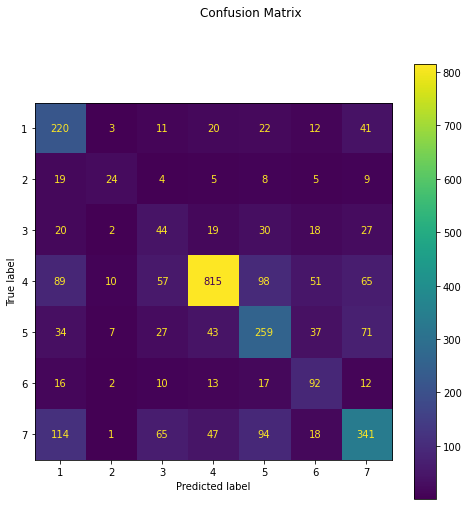

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
disp = metrics.plot_confusion_matrix(trained_hog_svm, list(test_hog_features), y_test, values_format = 'd', ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

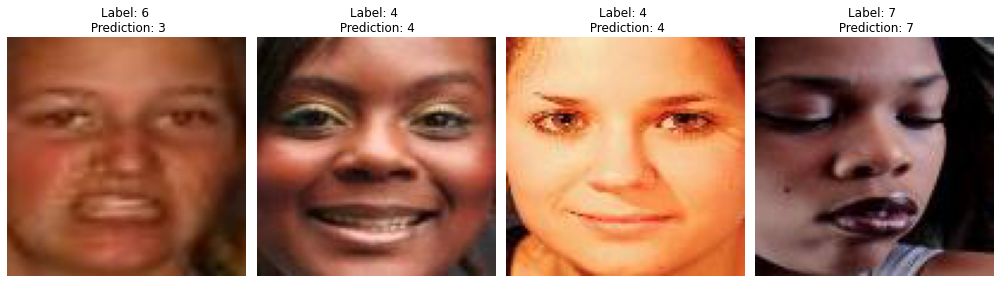

In [ ]:
X_test, y_test, predicted_hog_svm = shuffle(X_test , y_test, predicted_hog_svm)
#X_test_img = X_test.reshape(-1, 100, 100)


fig, axes = plt.subplots(1, 4, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(4):
    ax[i].imshow(X_test[i])
    ax[i].set_title(f'Label: {y_test[i]} \n Prediction: {predicted_hog_svm[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

In [ ]:
1: Surprise 2: Fear 3: Disgust 4: Happiness 5: Sadness 6: Anger 7: Neutral